## CAR Prediction

In [2]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('car.csv')

In [4]:
df

Unnamed: 0  car_ID  symboling  CompanyName fueltype aspiration  \
0             0       1          3  alfa-romero      gas        std   
1             1       2          3  alfa-romero      ges        std   
2             2       3          1  alfa-romero      gas        std   
3             3       4          2         audi      gas        std   
4             4       5          2         audi      gas        std   
..          ...     ...        ...          ...      ...        ...   
200         200     201         -1        volvo      gas        std   
201         201     202         -1        volvo      gas      turbo   
202         202     203         -1        volvo      gas        std   
203         203     204         -1        volvo   diesel      turbo   
204         204     205         -1        volvo      gas      turbo   

    doornumber      carbody drivewheel enginelocation  ...  enginesize  \
0          two  convertible        rwd          front  ...         130   
1          two  convertible        rwd          front  ...         130   
2          two    hatchback        rwd          front  ...         152   
3         four        sedan        fwd          front  ...         109   
4         four        sedan        4wd          front  ...         136   
..         ...          ...        ...            ...  ...         ...   
200       four        sedan        rwd          front  ...         141   
201       four        sedan        rwd          front  ...         141   
202       four        sedan        rwd          front  ...         173   
203       four        sedan        rwd          front  ...         145   
204       four        sedan        rwd          front  ...         141   

     fuelsystem  boreratio  stroke  compressionratio horsepower peakrpm  \
0          mpfi       3.47    2.68               9.0        111    5000   
1          mpfi       3.47    2.68               9.0        111    5000   
2          mpfi       2.68    3.47               9.0        154    5000   
3          mpfi       3.19    3.40              10.0        102    5500   
4          mpfi       3.19    3.40               8.0        115    5500   
..          ...        ...     ...               ...        ...     ...   
200        mpfi       3.78    3.15               9.5        114    5400   
201        mpfi       3.78    3.15               8.7        160    5300   
202        mpfi       3.58    2.87               8.8        134    5500   
203         idi       3.01    3.40              23.0        106    4800   
204        mpfi       3.78    3.15               9.5        114    5400   

     citympg highwaympg    price  
0         21         27  13495.0  
1         21         27  16500.0  
2         19         26  16500.0  
3         24         30  13950.0  
4         18         22  17450.0  
..       ...        ...      ...  
200       23         28  16845.0  
201       19         25  19045.0  
202       18         23  21485.0  
203       26         27  22470.0  
204       19         25  22625.0  

[205 rows x 27 columns]

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      ges        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

# Q1) Identify and remove duplicate records if any.
### ans : there is no duplicated row

In [7]:
df[df.duplicated()==True]

Empty DataFrame
Columns: [car_ID, symboling, CompanyName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]

# Q2) Identify and remove duplicate records if any.
### ans : column stroke contain 6 null values

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              6
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

> ## These are the six rows having null values in stroke column

In [9]:
df[df['stroke'].isnull()==True]

car_ID  symboling CompanyName fueltype aspiration doornumber    carbody  \
5        6          2        audi      gas        std        two      sedan   
11      12          0         bmw      gas        std       four      sedan   
17      18          0         bmw      gas        std       four      sedan   
28      29         -1       dodge      gas        std       four      wagon   
39      40          0       honda      gas        std       four      sedan   
51      52          1       mazda      gas        std        two  hatchback   

   drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
5         fwd          front       99.8  ...         136        mpfi   
11        rwd          front      101.2  ...         108        mpfi   
17        rwd          front      110.0  ...         209        mpfi   
28        fwd          front      103.3  ...         122        2bbl   
39        fwd          front       96.5  ...         110        1bbl   
51        fwd          front       93.1  ...          91        2bbl   

    boreratio  stroke compressionratio horsepower  peakrpm citympg  \
5        3.19     NaN              8.5        110     5500      19   
11       3.50     NaN              8.8        101     5800      23   
17       3.62     NaN              8.0        182     5400      15   
28       3.34     NaN              8.5         88     5000      24   
39       3.15     NaN              9.0         86     5800      27   
51       3.03     NaN              9.0         68     5000      31   

    highwaympg    price  
5           25  15250.0  
11          29  16925.0  
17          20  36880.0  
28          30   8921.0  
39          33   8845.0  
51          38   6095.0  

[6 rows x 26 columns]

# Q3)  Replace 'null' with mean() in column 'stroke'.
### ans: null values are filled with the mean of stroke column

In [10]:
df['stroke'].fillna(np.mean(df['stroke']),inplace=True)

In [11]:

df.isnull().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Q2) 
# IV) Change the field name 'fueltype' from the dataframe to "Fuel

> ## Ans

In [12]:
df.rename(
    columns=({ 'fueltype': 'FuelType'}), 
    inplace=True,
)

In [13]:
df['FuelType']

0         gas
1         ges
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: FuelType, Length: 205, dtype: object

## Q3) Import matplotlib/seaborn libraries to develop your code to find the skewness of Car Prices by drawing Distribution Plot. Also draw Box Plot to know outliers and gravity of variance in prices.

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [15]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'FuelType', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

> ## skewness of Car Prices by drawing Distribution Plot.

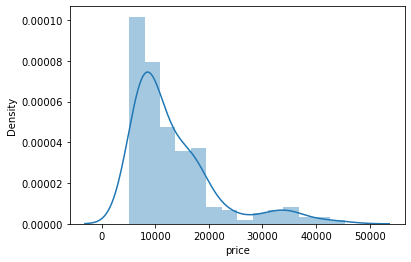

In [16]:
sns.distplot(df['price']);

> ## Box Plot to know outliers and gravity of variance in prices.

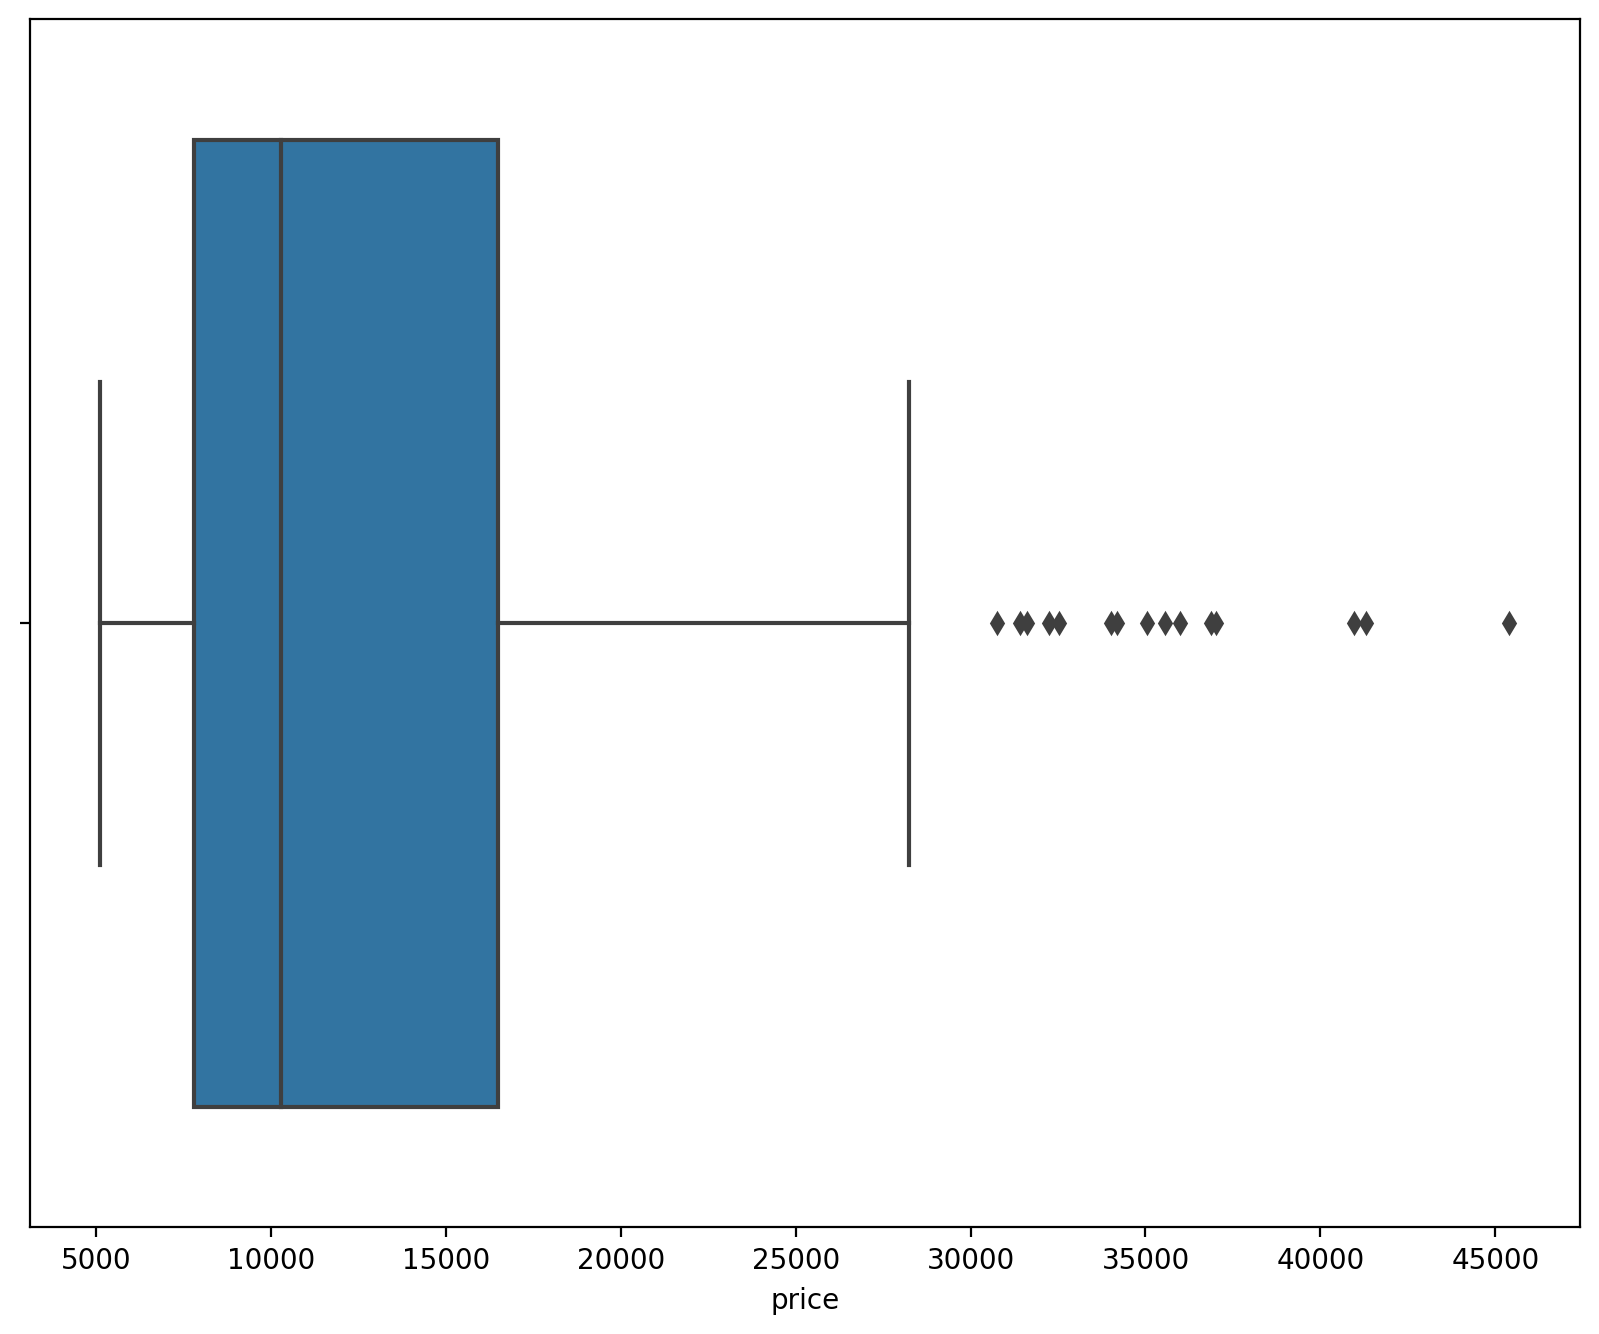

In [17]:
plt.figure(figsize=(10,8),dpi=200)
sns.boxplot(df['price']);

# Q3)
# il) Use the dataframe to create a Bar Chart showing 'Car Types' and their count. (5 Marks)
- Chart title 'Car Type Bar Chart' with font size 24 and colour
DarkGreen.
- The XLabel 'Car Type' with font size 15
- The YLabel 'Frequency of Car type with font size 15
- The ticks font size 10
- The ticks font size 10
- Bar colours: 'blue', 'orange', 'green', 'red', 'darkblue', 'gold' etc
- Edge colour: Black
- Orientation: 'Vertical'.

In [18]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'FuelType', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [19]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [20]:
Fuel=pd.get_dummies(df['FuelType'])

In [21]:
df=pd.concat((df,Fuel),axis=1)

In [22]:
df['FuelType'].unique()

array(['gas', 'ges', 'diesel'], dtype=object)

In [ ]:
font={
    'fontsize':24,
        'color':'DarkGreen'
}
sns.countplot(df[['gas','ges','diesel']])
plt.title('Car Type Bar Chart',fontdict=font)
plt.xlabel('cartype');

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = df[['citympg', 'highwaympg']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model and fit it to the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Print the coefficients, RMSE, and coefficient of determination
print('Coefficients:', lr.coef_)
y_pred = lr.predict(X_test)
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))
print('Coefficient of Determination:', r2_score(y_test, y_pred))

Coefficients: [-415.24896205 -475.04705611]
Root Mean Squared Error: 6984.868425523582
Coefficient of Determination: 0.38198756057473504
